In [1]:
import numpy as np
import torch
from helper_functions.helper_functions import NoiseAddition,DataNormalization, Interpolate, RandomHorizontalFlipBscan
from matplotlib import pyplot as plt

In [2]:
data=np.load(r'E:\Simulated_and_experimental_data\Synthetic_data\B-scans\data\param_fbh_gaussian_size10mm_depth10pct_thickness3mm_row_0180.npy',allow_pickle=True)
mask=np.load(r'E:\Simulated_and_experimental_data\Synthetic_data\B-scans\detection\param_fbh_gaussian_size10mm_depth10pct_thickness3mm_row_0180.npy',allow_pickle=True)
depth=np.load(r'E:\Simulated_and_experimental_data\Synthetic_data\B-scans\depth\param_fbh_gaussian_size10mm_depth10pct_thickness3mm_row_0180.npy',allow_pickle=True)

In [3]:
data=torch.from_numpy(data).unsqueeze(0).unsqueeze(0).float()
mask=torch.from_numpy(mask).unsqueeze(0).unsqueeze(0).float()
depth=torch.from_numpy(depth).unsqueeze(0).unsqueeze(0).float()

In [4]:
config=np.load(r'C:\Users\stone\Temporal_thermal_image\normalization_params.npz',allow_pickle=True)
deltaT_max=config['T_max']
deltaT_min=config['T_min']
data_normalization=DataNormalization(deltaT_max,deltaT_min)
data=data_normalization.normalize(data)

In [5]:
resize=Interpolate(size=512)
data=resize.interpolate(data)

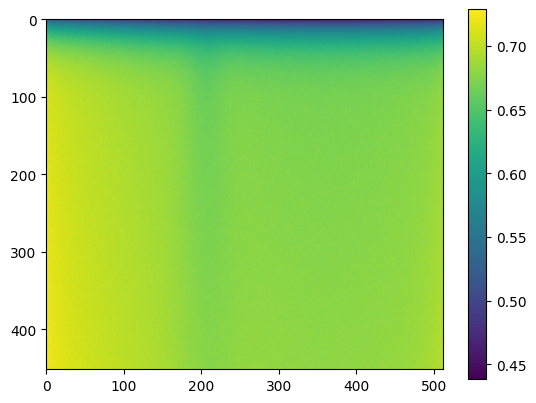

In [9]:
plt.imshow(data[0,0,60:,:])
plt.colorbar()